In [1]:
# import packages
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc
import os
from scipy.integrate import odeint
from scipy.signal import find_peaks, peak_prominences
import scipy.integrate as spi
import scipy.stats as st
from array import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
import scipy.io as io
import math
import random
import pickle
from sklearn.metrics import r2_score
from scipy.interpolate import CubicSpline
#from ipynb.fs.full.All_Functions import GetPopParams
#from ipynb.fs.full.All_Functions import GetPopParamsOmega
#from ipynb.fs.full.All_Functions import GetVLIndParams
#from ipynb.fs.full.All_Functions import RandVLIndParams
#from ipynb.fs.full.All_Functions import RandVLParams
#from ipynb.fs.full.All_Functions import PKPDParams
#from ipynb.fs.full.All_Functions import Cohort_Prep
#from ipynb.fs.full.All_Functions import VLModel
#from ipynb.fs.full.All_Functions import VLPKPD
#from ipynb.fs.full.All_Functions import PK_Model
#from ipynb.fs.full.All_Functions import PD_Model
#from ipynb.fs.full.All_Functions import SetInit
#from ipynb.fs.full.All_Functions import SimulateTreatment
#from ipynb.fs.full.All_Functions import Trial_Simulation
#from ipynb.fs.full.All_Functions import Trial_Simulation_paramInput
#from ipynb.fs.full.All_Functions import SimulateTreatmentPK
#from ipynb.fs.full.All_Functions import TreatmentImpact
#from ipynb.fs.full.All_Functions import CI_Calc
#from ipynb.fs.full.All_Functions import ParamsPrep
%matplotlib inline

In [2]:
def StandardDoseTimeSim(TrtmntStrtDay, params, 
                        PKPDInd, param_dict, PotRed, MolMass, dose, SetInit, VLPKPD,
                       TreatmentLength = 5, TreatmentFrequency = 0.5):
    X = []
    times = []
    for idi, tstart, in enumerate(TrtmntStrtDay):
        t, y, dosetimes = Trial_Simulation_paramInput(tstart, params[idi][:], 
                                                      PKPDInd[idi], param_dict[idi], 
                                                      PotRed, MolMass, dose, SetInit, VLPKPD,
                               TreatmentLength = TreatmentLength, TreatmentFrequency = TreatmentFrequency)
        T,R,E,I,V, Ag, A1, A2 = y.T
        X.append(np.log10(np.maximum(V,500)))
       # X[idi][X[idi]==2]=1
        times.append(t)
    return X, times

In [3]:
##  --- Within-host parameters


data_file = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchinsonCancerResearchCenter/Schiffer Group - Shared Resources - SARSCoV2ComboModeling/Within-Host Viral Dynamics Model/NBACohort/NBA_1510infections_7BroadVariants.csv'
Data_df = pd.read_csv(data_file)
Data_Omicron_symp = Data_df[(Data_df.cat_Lineage7variants=='Omicron')*(Data_df.cat_SympEver!='No')]
Data_Omicron= Data_df[(Data_df.cat_Lineage7variants=='Omicron')]
IDs_Symp_Omicron = Data_Omicron_symp.ID.unique()
IDs_Omicron = Data_Omicron.ID.unique()
print(len(IDs_Omicron))

Data_unVacc = Data_df[(Data_df.cat_VaccStatus!='Boosted')*(Data_df.cat_VaccStatus!='Second dose')*(Data_df.cat_VaccStatus!='First dose') ]
Data_unVacc_symp = Data_unVacc[Data_unVacc.cat_SympEver != 'No']
IDs_Symp = Data_unVacc_symp.ID.unique()

IndParameters = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchinsonCancerResearchCenter/Schiffer Group - Shared Resources - SARSCoV2ComboModeling/Within-Host Viral Dynamics Model/NBACohort/getModes_Run004/IndividualParameters/estimatedIndividualParameters.txt'
PopParameters = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchinsonCancerResearchCenter/Schiffer Group - Shared Resources - SARSCoV2ComboModeling/Within-Host Viral Dynamics Model/NBACohort/getModes_Run004/populationParameters.txt'

parameters_df = pd.read_csv(IndParameters)
Popparameters_df = pd.read_csv(PopParameters)
## --------------------- PK parameters -----------------------------
Indparameters_MPV_file = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchinsonCancerResearchCenter/Schiffer Group - Shared Resources - SARSCoV2ComboModeling/PK-PD Modeling/MPVestimatedIndividualParameters.txt'
Popparameters_MPV_file = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchinsonCancerResearchCenter/Schiffer Group - Shared Resources - SARSCoV2ComboModeling/PK-PD Modeling/MPVpopulationParameters.txt'
#data_file = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/PK-PD/NBACohort/NBA_FreqTestersAppendNegativesToAll.csv'



Indparameters_MPV = pd.read_csv(Indparameters_MPV_file)
Popparameters_MPV = pd.read_csv(Popparameters_MPV_file)
#print(Popparameters_MPV)




1023


/var/folders/z2/v4k5h92d3x34xw1wf5f8b_nh0000gp/T/ipykernel_96166/2126991673.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_df = pd.read_csv(data_file)


In [4]:
data_File = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Data/NBA_Panoramic_PLATCOV_MPV.csv'
Data_df = pd.read_csv(data_File)

NBA = Data_df[Data_df.cat_Cohort == 'NBA']
PLATCOV_Cntrl = Data_df[Data_df.cat_Cohort == 'PLATCOV']
PLATCOV_Trtmnt = Data_df[Data_df.cat_Cohort == 'PLATCOV_trtmnt']
Panoramic_Cntrl= Data_df[Data_df.cat_Cohort == 'Panoramic']
Panoramic_Trtmnt= Data_df[Data_df.cat_Cohort == 'Panoramic_trtmnt']

IDs_Tot = Data_df.ID.unique()
IDs_NBA = NBA.ID.unique()
IDs_Platcov_Cntrl = PLATCOV_Cntrl.ID.unique()
IDs_Platcov_trtmnt = PLATCOV_Trtmnt.ID.unique()

IDs_Panoramic_Cntrl = Panoramic_Cntrl.ID.unique()
IDs_Panoramic_trtmnt = Panoramic_Trtmnt.ID.unique()

IndParameters_Trials = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Projects/NBA_Omicron_MPV_Panoramic_Platcov_Trial_tau_CovNBA_PLACntrl_Trtmtn_prf_est_Emax=1/IndividualParameters/estimatedIndividualParameters.txt'
#r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Projects/NBA_Omicron_MPV_Panoramic_Platcov_Trial_tau_CovNBA_PLACntrl_Trtmtn_prf_est_Emax=1/IndividualParameters/estimatedIndividualParameters.txt'
PopParameters_Trials = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Projects/NBA_Omicron_MPV_Panoramic_Platcov_Trial_tau_CovNBA_PLACntrl_Trtmtn_prf_est_Emax=1/IndividualParameters/estimatedIndividualParameters.txt'
#r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Projects/NBA_Omicron_MPV_Panoramic_Platcov_Trial_tau_CovNBA_PLACntrl_Trtmtn_prf_est_Emax=1/populationParameters.txt'

parameters_df_Trials = pd.read_csv(IndParameters_Trials)
Popparameters_df_Trials = pd.read_csv(PopParameters_Trials)

In [5]:
def GetVLIndParams(parameters_df, ID, style = 'mode'):
    ''' 
    input:
        - data frame with parameter values as columns, individuals as rows
        - ID identifying individual of interest
        - style = 'mode' or 'mean' or 'SAEM' depending on which parameter values are preferred
    return:
        - dictionary with parameter names as key and parameter values as values
    '''
    i = ID
    cols = list(parameters_df)
    pid_params = parameters_df[parameters_df.id == i]
    values = []
    keys = []
    for c in cols:
        if style in c:
            k = c.split('_')[0]
            keys.append(k)
            v = pid_params[c].values[0]
            values.append(v)
    for i,(v,k) in enumerate(zip(values, keys)):
        if 'log10' in k:
            values[i] = 10**v
            keys[i] = k.split('0')[1]

    params = dict(zip(keys, values))
    return params

In [6]:
def GetPopParams(Popparameters, dose):
    ''' 
    input:
        - data frame with parameter values as columns, individuals as rows

    return:
        - dictionary with parameter names as key and parameter values as values
    '''
    cols = list(Popparameters.parameter)
   # print(cols)
    pid_params = Popparameters
  #  print(pid_params.value)
    values = []
    keys = []
    for i, c in enumerate(cols):
        if 'pop' in c:
            k = c.split('_')[0]
            keys.append(k)
         #   print(keys)
            v = pid_params.value[i]
            values.append(v)
         #   print(values)
            
        for i,(v,k) in enumerate(zip(values, keys)):
            if 'log10' in k:
                values[i] = 10**v
                keys[i] = k.split('0')[1]
    if 'alpha' in keys:
        i = keys.index('alpha')
        j = keys.index('kPL')
        values[j] = values[j]*dose**values[i]

    params = dict(zip(keys, values))
    return params

In [7]:
def ParamsPrep(Cohort, CohortStyle, GetVLIndParams, RandVLParams, parameters_df, Popparameters_df, fixed_params, param_order, param_dist,
               PKPDParams, Popparameters_PK, GetPopParams, GetPopParamsOmega, Emax, IC50, Hill,PDOm, dose):

    VLparams = []
    PKPD_params = []
    param_dict = []
    for ID in Cohort:
        if CohortStyle == 'direct':
            ind_params = GetVLIndParams(parameters_df, ID, style = 'mode')
        else:
            ind_params = RandVLParams(Popparameters_df, param_dist)
            
        _dict = {**fixed_params, **ind_params}
        param_dict.append(_dict)
        params = []
        for k in param_order:
            params.append(_dict[k])
        VLparams.append(params)
        pkpd =PKPDParams(Popparameters_PK, GetPopParams, GetPopParamsOmega, Emax, IC50, Hill, dose, PDOm)
        PKPD_params.append(pkpd)
    return VLparams, PKPD_params, param_dict

In [8]:
def PKPDParams(Popparameters, GetPopParams, GetParamsOmega, Emax, IC50, Hill, dose, PDOm):
    
    param_Order = ['ka', 'k12', 'k21', 'kcl', 'Vol', 'Emax', 'IC50', 'Hill']
    PKparams = GetPopParams(Popparameters, dose)
    PKparams_Val = PKparams['ka'], PKparams['kPL'], PKparams['kLP'], PKparams['kCl'],PKparams['Vol']
    PDparams = Emax, IC50, Hill
    PKPDparams = np.hstack((PKparams_Val, PDparams))
    
   # PKOm = GetParamsOmega(Popparameters, dose)
   # PKOm_Val = PKOm['ka'], PKOm['kPL'], PKOm['kLP'], PKOm['kCl'],PKOm['Vol']
    PKOm_Val = 0, 0, 0, 0, 0
    PKPDOm = np.hstack((PKOm_Val, PDOm))
    eta = np.random.normal(np.zeros(len(PKPDOm)), PKPDOm, len(PKPDOm))
    PKPDInd = PKPDparams*np.exp(eta)
    return dict(zip(param_Order, PKPDInd))

In [9]:
def VLPKPD(y, t, beta, phi, rho, k, delta, m, pi, c,tAI, ka, k12, kcl, k21,Vol, MolMass,E_max, IC50, Hill_Coeff):
    T,R,E,I,V,Vm, Ag, A1, A2 = y
    
    # PK model 
    dAg = -ka*Ag
    dA1 = ka*Ag+k21*A2-(kcl+k12)*A1
    dA2 = k12*A1-k21*A2   
    
    # PD model 
    conc = np.maximum(A1,10**-8)*10**6/Vol/MolMass # # convert to from mg/mL to micromolar
    epsM = np.divide(np.multiply(E_max,np.power(conc,Hill_Coeff)),(np.power(IC50, Hill_Coeff)+np.power(conc,Hill_Coeff)))
        
    # within-host treatment model
    if t > tAI:
        m_AI = m
    else:
        m_AI = 0
    
    
    ddt_T = -beta*T*V - phi*I*T + rho*R
    ddt_R = phi*I*T -rho*R
    ddt_E = beta*T*V - k*E
    ddt_I = k*E - delta*I - m_AI*I
    if I>=1:
        ddt_V = (1-epsM)*pi*I-c*V
        ddt_Vm = epsM*pi*I-c*Vm
    else:
        ddt_V = -c*V
        ddt_Vm = -c*Vm

    return  ddt_T, ddt_R, ddt_E, ddt_I, ddt_V, ddt_Vm, dAg, dA1, dA2


In [10]:
def Trial_Simulation_paramInput(TrtmntStrtDay, params, 
                                PKPDInd, param_dict, PotRed, MolMass, dose, SetInit, VLPKPD,
                               TreatmentLength = 5, TreatmentFrequency = 0.5):
        # import parameters
        # extract initial time
        t0 = -param_dict['tzero']
    
        t_end = 30 #duration of simulation 30 days after symptom onset. 
        init = SetInit(param_dict)
        init.extend([0,0,0])
        
        dosetimes = TrtmntStrtDay + np.arange(0,TreatmentLength,TreatmentFrequency)

        t,y = SimulateTreatment(VLPKPD, init, t0, 0.001, t_end, params, PKPDInd, dose, dosetimes, PotRed, 
                                MolMass)
        return t, y, dosetimes

In [11]:
def Incubation_Prep(Data_unVacc_symp, Incubation_params, Cohort, TrtmntStrtDay, params, 
                        PKPDInd, param_dict, PotRed, MolMass, dose, SetInit, VLPKPD,
                       TreatmentLength = 5, TreatmentFrequency = 0.5):
    for idi, ID, tstart, in zip(range(0,len(Cohort)), Cohort, TrtmntStrtDay):

            tzero_est = param_dict[idi]['tzero']
            tau_est = param_dict[idi]['tau']
            if Data_unVacc_symp[Data_unVacc_symp.ID == ID].cat_Lineage7variants.unique()[0]=='None':
                Lineage = 'Total'
                shape = (Incubation_params[Incubation_params.VOC == Lineage].Mean/Incubation_params[Incubation_params.VOC == Lineage].sd)**2
                scale = (Incubation_params[Incubation_params.VOC == Lineage].sd**2)/Incubation_params[Incubation_params.VOC == Lineage].Mean
            else:
                Lineage = Data_unVacc_symp[Data_unVacc_symp.ID==ID].cat_Lineage7variants.unique()[0]
                shape = (Incubation_params[Incubation_params.VOC == Lineage].Mean/Incubation_params[Incubation_params.VOC == Lineage].sd)**2
                scale = (Incubation_params[Incubation_params.VOC == Lineage].sd**2)/Incubation_params[Incubation_params.VOC == Lineage].Mean

            incub = np.random.gamma(shape, scale)

            params[idi][-1] = params[idi][-1]+(tzero_est-incub[0])
            param_dict[idi]['tzero']=incub[0]
            param_dict[idi]['tau']=params[idi][-1]
            t, y, dosetimes = Trial_Simulation_paramInput(tstart, params[idi][:], 
                                                          PKPDInd[idi], param_dict[idi], 
                                                          PotRed[idi], MolMass, 0, SetInit, VLPKPD,
                                   TreatmentLength = TreatmentLength, TreatmentFrequency = TreatmentFrequency)
            T,R,E,I,V, Vm, Ag, A1, A2 = y.T
            v = np.log10(np.maximum(V+Vm,100))
            v[v==np.log10(100)]=np.log10(50)
            Tmax_index = np.argwhere(v==max(v))[0][0]
            Tmax = t[Tmax_index]

            PS_Duration = t[np.where((v == np.log10(50)) & (t>Tmax))]

            while (len(PS_Duration) != 0 and PS_Duration[0]<5):  #to assure duration of infection after symptom is greater than 5 days
                params[idi][-1] = tau_est
                param_dict[idi]['tzero']=tzero_est
                param_dict[idi]['tau']=tau_est

                incub = np.random.gamma(shape, scale)

                params[idi][-1] = params[idi][-1]+(tzero_est-incub[0])
                param_dict[idi]['tzero']=incub[0]
                param_dict[idi]['tau']=params[idi][-1]

                t, y, dosetimes = Trial_Simulation_paramInput(tstart, params[idi][:], 
                                                          PKPDInd[idi], param_dict[idi], 
                                                          PotRed[idi], MolMass, 0, SetInit, VLPKPD,
                                   TreatmentLength = TreatmentLength, TreatmentFrequency = TreatmentFrequency)
                T,R,E,I,V, Vm, Ag, A1, A2 = y.T
                v = np.log10(np.maximum(V+Vm,100))
                v[v==np.log10(100)]=np.log10(50)
                Tmax_index = np.argwhere(v==max(v))[0][0]
                Tmax = t[Tmax_index]
                PS_Duration = t[np.where((v == np.log10(50)) & (t>Tmax))]
    
    return params, param_dict

In [12]:
def SimulateTreatment(VLPKPD, init, tzero, dt, tend, params, PKPDInd, dose, dosetimes, PotRed, MolMass):
    #Nirmatrelvir PD parameters
    E_max = PKPDInd['Emax']
    Hill_Coeff = PKPDInd['Hill']
    IC50 = PotRed*PKPDInd['IC50']

    #Nirmatrelvir PK Parameters for each individual
    ka = PKPDInd['ka']
    k12 = PKPDInd['k12']
    k21 = PKPDInd['k21']
    kcl = PKPDInd['kcl']
    Vol = PKPDInd['Vol']
    params_local = params.copy()
    params_local.extend([ka, k12, kcl, k21,Vol, MolMass, E_max, IC50, Hill_Coeff])
    args = tuple(params_local)
  
    if tzero==dosetimes[0]:
        for j in range(0,len(dosetimes)-1):
            init[6] = init[6] + dose 
            ttemp = np.arange(dosetimes[j],dosetimes[j+1],dt)
            ytemp = spi.odeint(VLPKPD, init, ttemp, args = args)
            init = ytemp[-1,:].T
            if j==0:
                y= ytemp.copy()
                t= ttemp.copy()
            else:
                y = np.concatenate((y,ytemp), axis=0)
                t = np.concatenate((t,ttemp))
    else:       
        
        # simulate infection from tzero up to 1st dose
        t = np.arange(tzero, dosetimes[0],dt)
        # simulate using scipy integrate
        y = spi.odeint(VLPKPD, init, t, args = args)
   
        ytemp = y.copy()

        #loop through dose values
        for j in range(0,len(dosetimes)-1):
            init = ytemp[-1,:].T
            init[6] = init[6] + dose 
            ttemp = np.arange(dosetimes[j],dosetimes[j+1],dt)
        
            ytemp = spi.odeint(VLPKPD, init, ttemp, args = args)
            t=np.concatenate((t,ttemp))
            y=np.concatenate((y,ytemp),axis=0)        
    #simulate until tend
    init = ytemp[-1,:].T
    init[6] = init[6] + dose 
    ttemp = np.arange(dosetimes[-1],tend,dt)
    ytemp = spi.odeint(VLPKPD, init, ttemp, args = args)
    t=np.concatenate((t,ttemp))
    y=np.concatenate((y,ytemp),axis=0)  
    return t, y

In [13]:
param_order = ['beta', 'phi', 'rho', 'k', 'delta', 'm', 'pi', 'c', 'tau']
fixed_params = dict({'c': 15, 'r':10, 'k':4})
param_dist = dict({'log10beta':'normal', 'log10phi':'normal', 'log10rho':'normal', 
                   'delta':'logNormal', 'h': 'logNormal', 'm': 'logNormal', 
                   'log10pi':'normal','tau': 'logNormal', 'tzero':'logitNormal',
                   'tzeromin': 0.75, 'tzeromax':20})

Incubation_params = []
Variance = ['Historic', 'Alpha', 'Gamma', 'Delta', 'Omicron', 'Total']
Mean = [4.61, 4.96, 5.18, 4.43, 3.61, 4.54, 4.54]
SD = [2.24, 2.32, 2.72, 2.19, 1.82, 2.25]

for var, mean, sd in zip(Variance, Mean, SD):
    Incubation_params.append({'VOC': var, 'Mean': mean, 'sd': sd})

Incubation_params = pd.DataFrame(Incubation_params)
Incubation_params[Incubation_params.VOC == 'Historic'].Mean

0    4.61
Name: Mean, dtype: float64

In [14]:
def SetInit(param_dict):
    T_0 = 10**7
    R_0 = 0;
    E_0 = 0;
    I_0 = 0
    V_0 = param_dict['Vzero']
    Vm_0 = 0
    #param_dict['pi']*I_0/param_dict['c']
    return [T_0, R_0, E_0, I_0, V_0, Vm_0]

In [15]:
# Molnupiravir in vitro IC50
Emax = 1.00
IC50 = 0.177 #uMol
Hill = 2.05
PDOm = 0, 0.0066, 0.22
MolMass = 329.31   #g/Mol
dose =800

In [ ]:
Num = 400
dose = 800
Mean_drop_VL_TotPop_trtmnt_dayon = []
Mean_drop_VL_TotPop_trtmnt_dayone = []
drop_VL = []
drop_VL_active = []
mean_eff = []
VL_drop_day5_Moveout = []
VL_drop_day5_std_Moveout = []
active_VL_drop_day5_Moveout = []
active_VL_drop_day5_std_Moveout = []
VL_drop_day5_Moveout_Rel_Placebo = []
active_VL_drop_day5_Moveout_Rel_Placebo = []
VL_drop_placebo = pickle.load(open('TotVdrop_Cntrl_MOVeOUT.pickle', 'rb')) 

PotRed = np.ones(Num)
Cohort = pickle.load(open('BestCohort_Move_OUT.pickle', 'rb')) 
#Cohort_Prep(IDs_Symp, Num)
TreatmntStrtDay = random.choices(range(1,6), k=Num) #treatment starting within 5 days (days 1 through 5)
VLInd, PKPD_params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                        parameters_df, Popparameters_df, fixed_params, 
                                        param_order, param_dist, PKPDParams, 
                                        Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                        IC50, Hill,PDOm, dose = 8*10**8) #dose in ng
VLInd, param_dict = Incubation_Prep(Data_df, Incubation_params, Cohort,TreatmntStrtDay, VLInd, 
                                   PKPD_params, param_dict, PotRed, MolMass, dose, SetInit, VLPKPD,
                                   TreatmentLength = 5, TreatmentFrequency = 0.5)

for paf in np.linspace(-2, 2, 50):
    drop_VL = []
    drop_VL_active = []

    print(10**paf)
    PotRed=(10**paf)*np.ones(Num)
    
    for idi, ID, TrtmntStrtDay in zip(range(0,Num), Cohort, TreatmntStrtDay):

        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_params[idi], param_dict[idi], 
                                                     PotRed[idi], MolMass, dose, SetInit, VLPKPD, 
                                                 TreatmentLength = 5, TreatmentFrequency = 0.5) #dose in mg
        T,R,E,I,V, Vm, Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V+Vm,500))
        X[X==np.log10(500)]=np.log10(499)
        
        X_active = np.log10(np.maximum(V,500))
        X_active[X_active==np.log10(500)]=np.log10(499) 
        
        tstart = np.argwhere(t>=TrtmntStrtDay)[0][0]
        tend = np.argwhere(t>=TrtmntStrtDay)[0][0]+16000
        
        drop_VL.append(X[tstart:tend]-X[tstart])
        drop_VL_active.append(X_active[tstart:tend]-X_active[tstart])

    t3 = np.argwhere(np.linspace(0, 15.999, 16000)>=3)[0][0]
    t5 = np.argwhere(np.linspace(0, 15.999, 16000)>=5)[0][0]
    t10 = np.argwhere(np.linspace(0, 15.999, 16000)>=10)[0][0]
    t15 = np.argwhere(np.linspace(0, 15.999, 16000)>=15)[0][0]   
        


    conc = A1[tstart:tstart+t5]*10**6/PKPD_params[0]['Vol']/MolMass
    epsM = np.divide(np.multiply(Emax,np.power(conc,Hill)),(np.power(10**paf*IC50, Hill)+np.power(conc,Hill)))
    
    VL_drop_day5_Moveout.append(np.mean(drop_VL, axis=0)[t5])
    VL_drop_day5_std_Moveout.append(np.std(drop_VL, axis=0)[t5])
    active_VL_drop_day5_Moveout.append(np.mean(drop_VL_active, axis=0)[t5])
    active_VL_drop_day5_std_Moveout.append(np.std(drop_VL_active, axis=0)[t5])
    
    VL_drop_day5_Moveout_Rel_Placebo.append(np.mean(drop_VL, axis=0)[t5]-np.mean(VL_drop_placebo, axis=0)[t5])
    active_VL_drop_day5_Moveout_Rel_Placebo.append(np.mean(drop_VL_active, axis=0)[t5]-np.mean(VL_drop_placebo, axis=0)[t5])

    mean_eff.append(np.mean(epsM))


In [ ]:
pickle.dump(VL_drop_day5_Moveout_Rel_Placebo, open('VL_drop_day5_Moveout_Rel_Placebo.pickle', 'wb'))
pickle.dump(active_VL_drop_day5_Moveout_Rel_Placebo, open('active_VL_drop_day5_Moveout_Rel_Placebo.pickle', 'wb'))

In [16]:
VL_drop_day5_Moveout_Rel_Placebo = pickle.load(open('VL_drop_day5_Moveout_Rel_Placebo.pickle', 'rb'))
active_VL_drop_day5_Moveout_Rel_Placebo=pickle.load(open('active_VL_drop_day5_Moveout_Rel_Placebo.pickle', 'rb'))

In [23]:
Num = 400
dose = 800
Mean_drop_VL_TotPop_trtmnt_dayon = []
Mean_drop_VL_TotPop_trtmnt_dayone = []
drop_VL = []
drop_VL_active = []
mean_eff = []
VL_drop_day5_PLATCOV = []
VL_drop_day5_std_PLATCOV = []
active_VL_drop_day5_PLATCOV = []
active_VL_drop_day5_std_PLATCOV = []
VL_drop_day5_PLATCOV_Rel_Placebo = []
active_VL_drop_day5_PLATCOV_Rel_Placebo =[]
drop_VL_placebo =pickle.load(open('TotVdrop_Cntrl_PLATCOV_trialpartis.pickle', 'rb')) 
PotRed = np.ones(Num)
Cohort = IDs_Platcov_Cntrl
#pickle.load(open('BestCohort_PLATCOV.pickle', 'rb'))
#Cohort_Prep(IDs_Symp_Omicron, Num)
TreatmntStrtDay = np.zeros(len(Cohort)) #treatment starting within 3 days (days 1 through 3)
VLInd, PKPD_params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                        parameters_df_Trials, Popparameters_df_Trials, fixed_params, 
                                        param_order, param_dist, PKPDParams, 
                                        Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                        IC50, Hill,PDOm, dose = 8*10**8) #dose in ng
#VLInd, param_dict = Incubation_Prep(Data_df, Incubation_params, Cohort,TreatmntStrtDay, VLInd, 
#                                   PKPD_params, param_dict, PotRed, MolMass, dose, SetInit, VLPKPD,
#                                   TreatmentLength = 5, TreatmentFrequency = 0.5)

for paf in np.linspace(-2, 2, 50):
    drop_VL = []
    drop_VL_active = []
    print(10**paf)
    PotRed=(10**paf)*np.ones(len(Cohort))

    
    
    for idi, ID, TrtmntStrtDay in zip(range(0,len(Cohort)), Cohort, TreatmntStrtDay):
        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_params[idi], param_dict[idi], 
                                                     PotRed[idi], MolMass, dose, SetInit, VLPKPD, 
                                                 TreatmentLength = 5, TreatmentFrequency = 0.5) #dose in mg
        T,R,E,I,V, Vm, Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V+Vm,10**1.26))
      #  X[X==np.log10(100)]=np.log10(99)
        
        X_active = np.log10(np.maximum(V,10**1.26))
       # X_active[X_active==np.log10(100)]=np.log10(99)
        
        tstart = np.argwhere(t>=TrtmntStrtDay)[0][0]
        tend = np.argwhere(t>=TrtmntStrtDay)[0][0]+15000
        
        drop_VL.append(X[tstart:tend]-X[tstart])
        drop_VL_active.append(X_active[tstart:tend]-X_active[tstart])
        
        
    t1 = np.argwhere(np.linspace(0, 14.999, 15000)>=1)[0][0]
    t2 = np.argwhere(np.linspace(0, 14.999, 15000)>=2)[0][0]
    t3 = np.argwhere(np.linspace(0, 14.999, 15000)>=3)[0][0]
    t4 = np.argwhere(np.linspace(0, 14.999, 15000)>=4)[0][0]
    t5 = np.argwhere(np.linspace(0, 14.999, 15000)>=5)[0][0]
    t6 = np.argwhere(np.linspace(0, 14.999, 15000)>=6)[0][0]
    t7 = np.argwhere(np.linspace(0, 14.999, 15000)>=7)[0][0]
    t14 = np.argwhere(np.linspace(0, 14.999, 15000)>=14)[0][0] 

    conc = A1[tstart:tstart+t5]*10**6/PKPD_params[0]['Vol']/MolMass
    epsM = np.divide(np.multiply(Emax,np.power(conc,Hill)),(np.power(10**paf*IC50, Hill)+np.power(conc,Hill)))
    
    VL_drop_day5_PLATCOV.append(np.mean(drop_VL, axis=0)[t5])
    VL_drop_day5_std_PLATCOV.append(np.std(drop_VL, axis=0)[t5])
    active_VL_drop_day5_PLATCOV.append(np.mean(drop_VL_active, axis=0)[t5])
    active_VL_drop_day5_std_PLATCOV.append(np.std(drop_VL_active, axis=0)[t5])
    
    VL_drop_day5_PLATCOV_Rel_Placebo.append(np.mean(drop_VL, axis=0)[t5]-np.mean(drop_VL_placebo, axis=0)[t5])
    active_VL_drop_day5_PLATCOV_Rel_Placebo.append(np.mean(drop_VL_active, axis=0)[t5]-np.mean(drop_VL_placebo, axis=0)[t5])

    mean_eff.append(np.mean(epsM))


0.01
0.012067926406393288
0.014563484775012436
0.017575106248547922
0.021209508879201904
0.025595479226995357
0.030888435964774818
0.0372759372031494
0.04498432668969444
0.054286754393238594
0.0655128556859551
0.07906043210907697
0.09540954763499938
0.1151395399326447
0.13894954943731375
0.16768329368110074
0.20235896477251566
0.2442053094548651
0.29470517025518095
0.35564803062231287
0.42919342601287763
0.517947467923121
0.6250551925273969
0.7543120063354615
0.9102981779915218
1.0985411419875584
1.325711365590108
1.5998587196060574
1.9306977288832496
2.329951810515372
2.811768697974228
3.3932217718953264
4.094915062380423
4.941713361323833
5.963623316594642
7.196856730011514
8.68511373751352
10.481131341546853
12.648552168552959
15.264179671752318
18.420699693267146
22.229964825261934
26.826957952797247
32.374575428176435
39.06939937054613
47.1486636345739
56.89866029018293
68.66488450042998
82.86427728546842
100.0


In [ ]:
pickle.dump(VL_drop_day5_PLATCOV_Rel_Placebo, open('VL_drop_day5_PLATCOV_Rel_Placebo.pickle', 'wb'))
pickle.dump(active_VL_drop_day5_PLATCOV_Rel_Placebo, open('active_VL_drop_day5_PLATCOV_Rel_Placebo.pickle', 'wb'))

In [ ]:
VL_drop_day5_PLATCOV_Rel_Placebo = pickle.load(open('VL_drop_day5_PLATCOV_Rel_Placebo.pickle', 'rb'))
active_VL_drop_day5_PLATCOV_Rel_Placebo = pickle.load( open('active_VL_drop_day5_PLATCOV_Rel_Placebo.pickle', 'rb'))

In [25]:
Num = 400
dose = 800
Mean_drop_VL_TotPop_trtmnt_dayon = []
Mean_drop_VL_TotPop_trtmnt_dayone = []
drop_VL = []
drop_VL_active = []
mean_eff = []
VL_drop_day5_PANORAMIC = []
VL_drop_day5_std_PANORAMIC = []
active_VL_drop_day5_PANORAMIC = []
active_VL_drop_day5_std_PANORAMIC = []
VL_drop_day5_PANORAMIC_Rel_Placebo = []
active_VL_drop_day5_PANORAMIC_Rel_Placebo = []
drop_VL_placebo  = pickle.load(open('TotVdrop_Cntrl_PANORAMIC_trialpartis.pickle', 'rb')) 

Cohort = IDs_Panoramic_Cntrl
#pickle.load(open('BestCohort_PANORAMIC.pickle', 'rb'))
#Cohort_Prep(IDs_Symp_Omicron, Num)

TreatmntStrtDay = np.zeros(len(Cohort))
PotRed = np.ones(len(Cohort))
VLInd, PKPD_params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                        parameters_df_Trials, Popparameters_df_Trials, fixed_params, 
                                        param_order, param_dist, PKPDParams, 
                                        Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                        IC50, Hill,PDOm, dose = 8*10**8) #dose in ng

#VLInd, param_dict = Incubation_Prep(Data_df, Incubation_params, Cohort,TreatmntStrtDay, VLInd, 
#                                   PKPD_params, param_dict, PotRed, MolMass, dose, SetInit, VLPKPD,
#                                   TreatmentLength = 5, TreatmentFrequency = 0.5)

for paf in np.linspace(-2, 2, 50):
    drop_VL = []
    drop_VL_active = []
    print(10**paf)
    PotRed=(10**paf)*np.ones(len(Cohort))

    
    
    for idi, ID, TrtmntStrtDay in zip(range(0,len(Cohort)), Cohort, TreatmntStrtDay):

        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_params[idi], param_dict[idi], 
                                                     PotRed[idi], MolMass, dose, SetInit, VLPKPD, 
                                                 TreatmentLength = 5, TreatmentFrequency = 0.5) #dose in mg
        T,R,E,I,V, Vm, Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V+Vm,100))
        X[X==np.log10(100)]=np.log10(50)
        
        X_active = np.log10(np.maximum(V,100))
        X_active[X_active==np.log10(100)]=np.log10(50)

        
        tstart = np.argwhere(t>=TrtmntStrtDay)[0][0]
        tend = np.argwhere(t>=TrtmntStrtDay)[0][0]+16000
        
        drop_VL.append(X[tstart:tend]-X[tstart])

        drop_VL_active.append(X_active[tstart:tend]-X_active[tstart])

    
    t1 = np.argwhere(np.linspace(0, 15.999, 16000)>=1)[0][0]
    t2 = np.argwhere(np.linspace(0, 15.999, 16000)>=2)[0][0]
    t3 = np.argwhere(np.linspace(0, 15.999, 16000)>=3)[0][0]
    t4 = np.argwhere(np.linspace(0, 15.999, 16000)>=4)[0][0]
    t5 = np.argwhere(np.linspace(0, 15.999, 16000)>=5)[0][0]
    t6 = np.argwhere(np.linspace(0, 15.999, 16000)>=6)[0][0]
    t13 = np.argwhere(np.linspace(0, 15.999, 16000)>=13)[0][0] 
    
    conc = A1[tstart:tstart+t5]*10**6/PKPD_params[0]['Vol']/MolMass
    epsM = np.divide(np.multiply(Emax,np.power(conc,Hill)),(np.power(10**paf*IC50, Hill)+np.power(conc,Hill)))
    
    VL_drop_day5_PANORAMIC.append(np.mean(drop_VL, axis=0)[t5])
    VL_drop_day5_std_PANORAMIC.append(np.std(drop_VL, axis=0)[t5])
    active_VL_drop_day5_PANORAMIC.append(np.mean(drop_VL_active, axis=0)[t5])
    active_VL_drop_day5_std_PANORAMIC.append(np.std(drop_VL_active, axis=0)[t5])
    
    print(np.mean(drop_VL, axis=0)[t5])
    VL_drop_day5_PANORAMIC_Rel_Placebo.append(np.mean(drop_VL, axis=0)[t5]-np.mean(drop_VL_placebo, axis=0)[t5])
    active_VL_drop_day5_PANORAMIC_Rel_Placebo.append(np.mean(drop_VL_active, axis=0)[t5]-np.mean(drop_VL_placebo, axis=0)[t5])

    mean_eff.append(np.mean(epsM))


0.01
-4.2278437169978575
0.012067926406393288
-4.22722196844756
0.014563484775012436
-4.226341158793658
0.017575106248547922
-4.225091924525482
0.021209508879201904
-4.223319559572342
0.025595479226995357
-4.2208068354528425
0.030888435964774818
-4.217252252971678
0.0372759372031494
-4.212244539023798
0.04498432668969444
-4.205236922902496
0.054286754393238594
-4.171915236726399
0.0655128556859551
-4.129994112367308
0.07906043210907697
-4.072187143267716
0.09540954763499938
-4.019041539877651
0.1151395399326447
-3.9488322097882724
0.13894954943731375
-3.856503473284867
0.16768329368110074
-3.7496187443770927
0.20235896477251566
-3.626737370526576
0.2442053094548651
-3.514708959025361
0.29470517025518095
-3.3992341081011896
0.35564803062231287
-3.289228482710987
0.42919342601287763
-3.182695779643215
0.517947467923121
-3.093998172964228
0.6250551925273969
-3.006721166596955
0.7543120063354615
-2.9340225608957082
0.9102981779915218
-2.8690300397803035
1.0985411419875584
-2.81033293997849

In [ ]:
pickle.dump(VL_drop_day5_PANORAMIC_Rel_Placebo, open('VL_drop_day5_PANORAMIC_Rel_Placebo.pickle', 'wb'))
pickle.dump(active_VL_drop_day5_PANORAMIC_Rel_Placebo, open('active_VL_drop_day5_PANORAMIC_Rel_Placebo.pickle', 'wb'))

In [ ]:
VL_drop_day5_PANORAMIC_Rel_Placebo=pickle.load(open('VL_drop_day5_PANORAMIC_Rel_Placebo.pickle', 'rb'))
active_VL_drop_day5_PANORAMIC_Rel_Placebo=pickle.load( open('active_VL_drop_day5_PANORAMIC_Rel_Placebo.pickle', 'rb'))

In [ ]:
pickle.dump(mean_eff, open('mean_eff_MPV_vs_paf.pickle', 'wb'))

In [ ]:
mean_eff = pickle.load(open('mean_eff_MPV_vs_paf.pickle', 'rb'))

### Nirmatrelvir

In [ ]:
def VLPKPD(y, t, beta, phi, rho, k, delta, m, pi, c,tAI, ka, k12, kcl, k21,Vol, MolMass,E_max, IC50, Hill_Coeff):
    T,R,E,I,V,Ag, A1, A2 = y
    
    # PK model 
    dAg = -ka*Ag
    dA1 = ka*Ag+k21*A2-(kcl+k12)*A1
    dA2 = k12*A1-k21*A2   
    
    # PD model 
    conc = np.maximum(A1, 10**-8)*10**6/Vol/MolMass # # convert to from nanogram/mL to micromolar
    epsM = np.divide(np.multiply(E_max,np.power(conc,Hill_Coeff)),(np.power(IC50, Hill_Coeff)+np.power(conc,Hill_Coeff)))
        
    # within-host treatment model
    if t > tAI:
        m_AI = m
    else:
        m_AI = 0
    
    
    ddt_T = -beta*T*V - phi*I*T + rho*R
    ddt_R = phi*I*T -rho*R
    ddt_E = beta*T*V - k*E
    ddt_I = k*E - delta*I - m_AI*I
    if I>=1:
        ddt_V = (1-epsM)*pi*I-c*V
    else:
        ddt_V = -c*V

    return  ddt_T, ddt_R, ddt_E, ddt_I, ddt_V, dAg, dA1, dA2


In [ ]:
def Incubation_Prep(Data_unVacc_symp, Incubation_params, Cohort, TrtmntStrtDay, params, 
                        PKPDInd, param_dict, PotRed, MolMass, dose, SetInit, VLPKPD,
                       TreatmentLength = 5, TreatmentFrequency = 0.5):
    for idi, ID, tstart, in zip(range(0,len(Cohort)), Cohort, TrtmntStrtDay):

            tzero_est = param_dict[idi]['tzero']
            tau_est = param_dict[idi]['tau']
            if Data_unVacc_symp[Data_unVacc_symp.ID == ID].cat_Lineage7variants.unique()[0]=='None':
                Lineage = 'Total'
                shape = (Incubation_params[Incubation_params.VOC == Lineage].Mean/Incubation_params[Incubation_params.VOC == Lineage].sd)**2
                scale = (Incubation_params[Incubation_params.VOC == Lineage].sd**2)/Incubation_params[Incubation_params.VOC == Lineage].Mean
            else:
                Lineage = Data_unVacc_symp[Data_unVacc_symp.ID==ID].cat_Lineage7variants.unique()[0]
                shape = (Incubation_params[Incubation_params.VOC == Lineage].Mean/Incubation_params[Incubation_params.VOC == Lineage].sd)**2
                scale = (Incubation_params[Incubation_params.VOC == Lineage].sd**2)/Incubation_params[Incubation_params.VOC == Lineage].Mean

            incub = np.random.gamma(shape, scale)

            params[idi][-1] = params[idi][-1]+(tzero_est-incub[0])
            param_dict[idi]['tzero']=incub[0]
            param_dict[idi]['tau']=params[idi][-1]
            t, y, dosetimes = Trial_Simulation_paramInput(tstart, params[idi][:], 
                                                          PKPDInd[idi], param_dict[idi], 
                                                          PotRed[idi], MolMass, 0, SetInit, VLPKPD,
                                   TreatmentLength = TreatmentLength, TreatmentFrequency = TreatmentFrequency)
            T,R,E,I,V, Ag, A1, A2 = y.T
            v = np.log10(np.maximum(V,100))
            v[v==np.log10(100)]=np.log10(99)
            Tmax_index = np.argwhere(v==max(v))[0][0]
            Tmax = t[Tmax_index]

            PS_Duration = t[np.where((v == np.log10(50)) & (t>Tmax))]

            while (len(PS_Duration) != 0 and PS_Duration[0]<5):  #to assure duration of infection after symptom is greater than 5 days
                params[idi][-1] = tau_est
                param_dict[idi]['tzero']=tzero_est
                param_dict[idi]['tau']=tau_est

                incub = np.random.gamma(shape, scale)

                params[idi][-1] = params[idi][-1]+(tzero_est-incub[0])
                param_dict[idi]['tzero']=incub[0]
                param_dict[idi]['tau']=params[idi][-1]

                t, y, dosetimes = Trial_Simulation_paramInput(tstart, params[idi][:], 
                                                          PKPDInd[idi], param_dict[idi], 
                                                          PotRed[idi], MolMass, 0, SetInit, VLPKPD,
                                   TreatmentLength = TreatmentLength, TreatmentFrequency = TreatmentFrequency)
                T,R,E,I,V, Ag, A1, A2 = y.T
                v = np.log10(np.maximum(V,100))
                v[v==np.log10(100)]=np.log10(50)
                Tmax_index = np.argwhere(v==max(v))[0][0]
                Tmax = t[Tmax_index]
                PS_Duration = t[np.where((v == np.log10(50)) & (t>Tmax))]
    
    return params, param_dict

In [ ]:

def SimulateTreatment(VLPKPD, init, tzero, dt, tend, params, PKPDInd, dose, dosetimes, PotRed, MolMass):
    #Nirmatrelvir PD parameters
    E_max = PKPDInd['Emax']
    Hill_Coeff = PKPDInd['Hill']
    IC50 = PotRed*PKPDInd['IC50']

    #Nirmatrelvir PK Parameters for each individual
    ka = PKPDInd['ka']
    k12 = PKPDInd['k12']
    k21 = PKPDInd['k21']
    kcl = PKPDInd['kcl']
    Vol = PKPDInd['Vol']
    params_local = params.copy()
    params_local.extend([ka, k12, kcl, k21,Vol, MolMass, E_max, IC50, Hill_Coeff])
    args = tuple(params_local)
    if tzero==dosetimes[0]:
        for j in range(0,len(dosetimes)-1):
            init[5] = init[5] + dose 
            ttemp = np.arange(dosetimes[j],dosetimes[j+1],dt)
            ytemp = spi.odeint(VLPKPD, init, ttemp, args = args)
            init = ytemp[-1,:].T
            if j==0:
                y= ytemp.copy()
                t= ttemp.copy()
            else:
                y = np.concatenate((y,ytemp), axis=0)
                t = np.concatenate((t,ttemp))
         #   print(y.T[4])
    else:       
        
        # simulate infection from tzero up to 1st dose
        t = np.arange(tzero, dosetimes[0],dt)
        # simulate using scipy integrate
        y = spi.odeint(VLPKPD, init, t, args = args)
   
        ytemp = y.copy()
      #  print(ytemp.T[0])
        #loop through dose values
        for j in range(0,len(dosetimes)-1):
            init = ytemp[-1,:].T
            init[5] = init[5] + dose 
            ttemp = np.arange(dosetimes[j],dosetimes[j+1],dt)
        
            ytemp = spi.odeint(VLPKPD, init, ttemp, args = args)
         #   print(ytemp.T[4])
            t=np.concatenate((t,ttemp))
            y=np.concatenate((y,ytemp),axis=0)        
    #simulate until tend
    init = ytemp[-1,:].T
    init[5] = init[5] + dose 
    ttemp = np.arange(dosetimes[-1],tend,dt)
    ytemp = spi.odeint(VLPKPD, init, ttemp, args = args)
    t=np.concatenate((t,ttemp))
    y=np.concatenate((y,ytemp),axis=0)  
    return t, y

In [ ]:
def SetInit(param_dict):
    T_0 = 10**7
    R_0 = 0;
    E_0 = 0;
    I_0 = 0
    V_0 = param_dict['Vzero']
    #param_dict['pi']*I_0/param_dict['c']
    return [T_0, R_0, E_0, I_0, V_0]

In [ ]:
# Nirmatrelvir in vitro IC50
Emax = 0.9999
IC50 = 0.0436 #uMol
Hill = 3.16
PDOm = 0.026, 0.0032, 0.42
MolMass = 499.5  
dose =300

In [ ]:
Popparameters_U_file = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchinsonCancerResearchCenter/Schiffer Group - Shared Resources - SARSCoV2ComboModeling/PK-PD Modeling/NIRpopulationParameters(2).txt'

Popparameters_PK = pd.read_csv(Popparameters_U_file)

In [ ]:
Num = 400
dose = 300
Mean_drop_VL_TotPop_trtmnt_dayon = []
Mean_drop_VL_TotPop_trtmnt_dayone = []
drop_VL_symp = []
drop_VL_active = []
mean_eff_NIR = []
VL_drop_day5_NIR_symp = []
VL_drop_day5_std_NIR_symp = []
VL_drop_day5_NIR_EPIC_Rel_Placebo = []
PotRed=np.ones(Num)
Cohort = Cohort_Prep(IDs_Symp, Num)
    
TreatmntStrtDay = random.choices(range(1,4), k=Num) #treatment starting within 3 days (days 1 through 3)
VLInd, PKPD_params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                        parameters_df, Popparameters_df, fixed_params, 
                                        param_order, param_dist, PKPDParams, 
                                        Popparameters_PK, GetPopParams, GetPopParamsOmega, Emax, 
                                        IC50, Hill,PDOm, dose = 300) #dose in ng
VLInd, param_dict = Incubation_Prep(Data_df, Incubation_params, Cohort,TreatmntStrtDay, VLInd, 
                                   PKPD_params, param_dict, PotRed, MolMass, dose, SetInit, VLPKPD,
                                   TreatmentLength = 5, TreatmentFrequency = 0.5)

for paf in np.linspace(-2, 2, 50):
    drop_VL = []
    drop_VL_placebo = []
    print(10**paf)
    PotRed=(10**paf)*np.ones(Num)
    

    for idi, ID, TrtmntStrtDay in zip(range(0,Num), Cohort, TreatmntStrtDay):
        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_params[idi], param_dict[idi], 
                                                     PotRed[idi], MolMass, dose, SetInit, VLPKPD, 
                                                 TreatmentLength = 5, TreatmentFrequency = 0.5) #dose in mg
        T,R,E,I,V, Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V,100))
        X[X==np.log10(100)]=1
        
        t_placebo, y_placebo, dosetimes_placebo= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_params[idi], param_dict[idi], 
                                                     PotRed[idi], MolMass, 0, SetInit, VLPKPD, 
                                                 TreatmentLength = 5, TreatmentFrequency = 0.5) #dose in mg
        T_placebo,R_placebo,E_placebo,I_placebo,V_placebo, Ag_placebo, A1_placebo, A2_placebo = y_placebo.T
        X_placebo = np.log10(np.maximum(V_placebo,100))
        X_placebo[X_placebo==np.log10(100)]=1
        
        tstart = np.argwhere(t>=TrtmntStrtDay)[0][0]
        tend = np.argwhere(t>=TrtmntStrtDay)[0][0]+5000
        
        drop_VL.append(X[tstart:tend]-X[tstart])
        drop_VL_placebo.append(X_placebo[tstart:tend]-X_placebo[tstart])
    conc = A1[tstart:tend]*10**6/PKPD_params[0]['Vol']/MolMass
    epsM = np.divide(np.multiply(Emax,np.power(conc,Hill)),(np.power(10**paf*IC50, Hill)+np.power(conc,Hill)))
    
    VL_drop_day5_NIR_symp.append(np.mean(drop_VL, axis=0)[-1])
    VL_drop_day5_std_NIR_symp.append(np.std(drop_VL, axis=0)[-1])
   
    VL_drop_day5_NIR_EPIC_Rel_Placebo.append(np.mean(drop_VL, axis=0)[-1]-np.mean(drop_VL_placebo, axis=0)[-1])
    mean_eff_NIR.append(np.mean(epsM))


In [ ]:
pickle.dump(VL_drop_day5_NIR_EPIC_Rel_Placebo, open('VL_drop_day5_NIR_EPIC_Rel_Placebo.pickle', 'wb'))


In [19]:
VL_drop_day5_NIR_EPIC_Rel_Placebo = pickle.load(open('VL_drop_day5_NIR_EPIC_Rel_Placebo.pickle', 'rb'))

In [ ]:
Num = 400
dose = 300
Mean_drop_VL_TotPop_trtmnt_dayon = []
Mean_drop_VL_TotPop_trtmnt_dayone = []
drop_VL_symp = []
drop_VL_active = []
mean_eff_NIR = []
VL_drop_day5_NIR_symp_omi = []
VL_drop_day5_std_NIR_symp_omi = []
VL_drop_day5_NIR_PLATCOV_Rel_Placebo = []

PotRed=np.ones(Num)
Cohort = Cohort_Prep(IDs_Symp_Omicron, Num)
    
TreatmntStrtDay = random.choices(range(1,4), k=Num) #treatment starting within 4 days (days 1 through 3)
VLInd, PKPD_params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                        parameters_df, Popparameters_df, fixed_params, 
                                        param_order, param_dist, PKPDParams, 
                                        Popparameters_PK, GetPopParams, GetPopParamsOmega, Emax, 
                                        IC50, Hill,PDOm, dose = 300) #dose in ng
VLInd, param_dict = Incubation_Prep(Data_df, Incubation_params, Cohort,TreatmntStrtDay, VLInd, 
                                   PKPD_params, param_dict, PotRed, MolMass, dose, SetInit, VLPKPD,
                                   TreatmentLength = 5, TreatmentFrequency = 0.5)
for paf in np.linspace(-2, 2, 50):
    drop_VL = []
    drop_VL_placebo = []
    print(10**paf)
    PotRed=(10**paf)*np.ones(Num)

    for idi, ID, TrtmntStrtDay in zip(range(0,Num), Cohort, TreatmntStrtDay):
        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_params[idi], param_dict[idi], 
                                                     PotRed[idi], MolMass, dose, SetInit, VLPKPD, 
                                                 TreatmentLength = 5, TreatmentFrequency = 0.5) #dose in mg
        T,R,E,I,V, Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V,10**1.26))
      #  X[X==np.log10(100)]=np.log10(99)
        
        t_placebo, y_placebo, dosetimes_placebo= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_params[idi], param_dict[idi], 
                                                     PotRed[idi], MolMass, 0, SetInit, VLPKPD, 
                                                 TreatmentLength = 5, TreatmentFrequency = 0.5) #dose in mg
        T_placebo,R_placebo,E_placebo,I_placebo,V_placebo, Ag_placebo, A1_placebo, A2_placebo = y_placebo.T
        X_placebo = np.log10(np.maximum(V_placebo,10**1.26))
        tstart = np.argwhere(t>=TrtmntStrtDay)[0][0]
        tend = np.argwhere(t>=TrtmntStrtDay)[0][0]+5000
        
        drop_VL.append(X[tstart:tend]-X[tstart])
        drop_VL_placebo.append(X_placebo[tstart:tend]-X_placebo[tstart])
    conc = A1[tstart:tend]*10**6/PKPD_params[0]['Vol']/MolMass
    epsM = np.divide(np.multiply(Emax,np.power(conc,Hill)),(np.power(10**paf*IC50, Hill)+np.power(conc,Hill)))
    
    VL_drop_day5_NIR_symp_omi.append(np.mean(drop_VL, axis=0)[-1])
    VL_drop_day5_std_NIR_symp_omi.append(np.std(drop_VL, axis=0)[-1])
    VL_drop_day5_NIR_PLATCOV_Rel_Placebo.append(np.mean(drop_VL, axis=0)[-1]-np.mean(drop_VL_placebo, axis=0)[-1])
    mean_eff_NIR.append(np.mean(epsM))


In [ ]:
pickle.dump(VL_drop_day5_NIR_PLATCOV_Rel_Placebo, open('VL_drop_day5_NIR_PLATCOV_Rel_Placebo.pickle', 'wb'))

In [20]:
VL_drop_day5_NIR_PLATCOV_Rel_Placebo=pickle.load(open('VL_drop_day5_NIR_PLATCOV_Rel_Placebo.pickle', 'rb'))

In [ ]:
pickle.dump(mean_eff_NIR, open('mean_eff_NIR_vs_paf.pickle', 'wb'))

In [32]:
mean_eff_NIR = pickle.load(open('mean_eff_NIR_vs_paf.pickle', 'rb'))

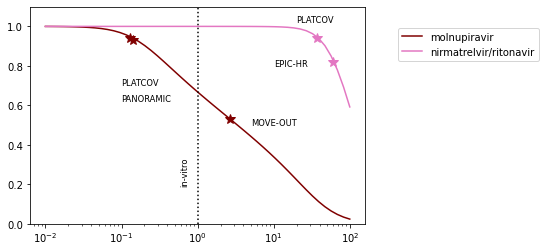

In [37]:
plt.semilogx(10**np.linspace(-2, 2, 50), mean_eff, '-', color = 'maroon', label = 'molnupiravir')
plt.plot([0.14, 0.13, 2.64], [0.93, 0.94, 0.53], '*', color = 'maroon', markersize = 10)
plt.text(0.1, 0.7, 'PLATCOV', size = 'small')
plt.text(0.1, 0.62, 'PANORAMIC', size = 'small')
plt.text(5, 0.5, 'MOVE-OUT', size = 'small')
plt.plot(10**np.linspace(-2, 2, 50), mean_eff_NIR, '-', color = 'tab:pink', label = 'nirmatrelvir/ritonavir')
plt.plot([37, 61], [0.94, 0.82], '*', color = 'tab:pink', markersize = 10)
plt.text(20, 1.02, 'PLATCOV', size = 'small')
plt.text(10, 0.8, 'EPIC-HR', size = 'small')
plt.vlines(x = 1, ymin = 0, ymax = 1.1, linestyle = 'dotted', color = 'k')
plt.text(0.6, 0.2, 'in-vitro', size = 'small', rotation = 90)
plt.ylim(0.0, 1.1)
plt.legend(loc = (1.1,0.75))

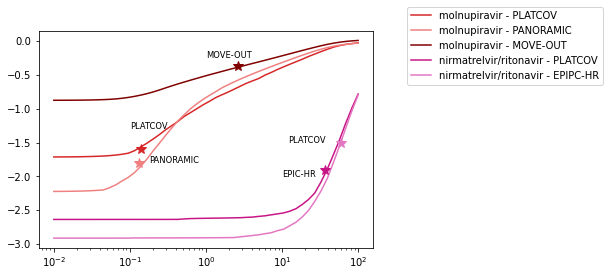

In [45]:
plt.semilogx(10**np.linspace(-2, 2, 50), VL_drop_day5_PLATCOV_Rel_Placebo, '-', 
             color = 'tab:red', label = 'molnupiravir - PLATCOV')

plt.semilogx(10**np.linspace(-2, 2, 50), VL_drop_day5_PANORAMIC_Rel_Placebo, '-', 
             color = 'lightcoral', label = 'molnupiravir - PANORAMIC')

plt.semilogx(10**np.linspace(-2, 2, 50), VL_drop_day5_Moveout_Rel_Placebo, '-', 
             color = 'maroon', label = 'molnupiravir - MOVE-OUT')
#plt.plot(10**np.linspace(-2, 2, 50), active_VL_drop_day5_Moveout, '--', color = 'maroon', label = 'Molnupiravir - non-mutated viral RNA')


#plt.plot(10**np.linspace(-2, 2, 50), active_VL_drop_day5_PLATCOV, '--', color = 'firebrick', label = 'Molnupiravir - non-mutated viral RNA')


#plt.plot(10**np.linspace(-2, 2, 50), active_VL_drop_day5_PANORAMIC, '--', color = 'lightcoral', label = 'Molnupiravir - non-mutated viral RNA')

plt.plot(0.13, -1.8, '*', color = 'lightcoral', markersize = 10)
plt.plot(0.14, -1.6, '*', color = 'tab:red', markersize = 10)
plt.plot(2.64, -0.37, '*', color = 'maroon', markersize = 10)
plt.text(.1, -1.3, 'PLATCOV', size = 'small')
plt.text(0.18, -1.8, 'PANORAMIC', size = 'small')
plt.text(1, -0.25, 'MOVE-OUT', size = 'small')

plt.plot(10**np.linspace(-2, 2, 50), VL_drop_day5_NIR_PLATCOV_Rel_Placebo, '-', color = 'mediumvioletred', label = 'nirmatrelvir/ritonavir - PLATCOV')
plt.plot(10**np.linspace(-2, 2, 50), VL_drop_day5_NIR_EPIC_Rel_Placebo, '-', color = 'tab:pink', label = 'nirmatrelvir/ritonavir - EPIPC-HR')
plt.plot(37, -1.9, '*', color = 'mediumvioletred', markersize = 10)
plt.plot(60, -1.5, '*', color = 'tab:pink', markersize = 10)
plt.text(12, -1.5, 'PLATCOV', size = 'small')
plt.text(10, -2, 'EPIC-HR', size = 'small')
#plt.ylim(0.0, 1.1)
plt.legend(loc = (1.1,0.75))

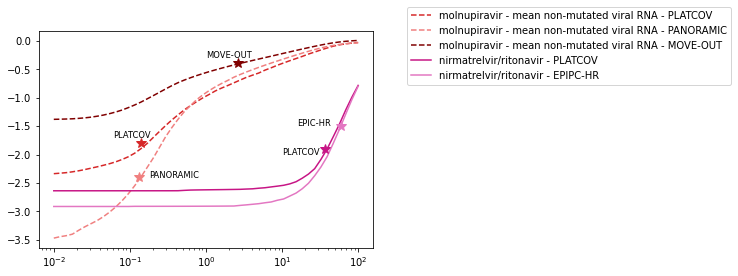

In [55]:
plt.semilogx(10**np.linspace(-2, 2, 50), active_VL_drop_day5_PLATCOV_Rel_Placebo, 
             '--', color = 'tab:red', label = 'molnupiravir - mean non-mutated viral RNA - PLATCOV')

plt.semilogx(10**np.linspace(-2, 2, 50), active_VL_drop_day5_PANORAMIC_Rel_Placebo, '--',
             color = 'lightcoral', label = 'molnupiravir - mean non-mutated viral RNA - PANORAMIC')

plt.semilogx(10**np.linspace(-2, 2, 50), active_VL_drop_day5_Moveout_Rel_Placebo, '--', 
             color = 'maroon', label = 'molnupiravir - mean non-mutated viral RNA - MOVE-OUT')
#plt.plot(10**np.linspace(-2, 2, 50), active_VL_drop_day5_Moveout, '--', color = 'maroon', label = 'Molnupiravir - non-mutated viral RNA')


#plt.plot(10**np.linspace(-2, 2, 50), active_VL_drop_day5_PLATCOV, '--', color = 'firebrick', label = 'Molnupiravir - non-mutated viral RNA')


#plt.plot(10**np.linspace(-2, 2, 50), active_VL_drop_day5_PANORAMIC, '--', color = 'lightcoral', label = 'Molnupiravir - non-mutated viral RNA')

plt.plot(0.13, -2.4, '*', color = 'lightcoral', markersize = 10)
plt.plot(0.14, -1.8, '*', color = 'tab:red', markersize = 10)
plt.plot(2.64, -0.38, '*', color = 'maroon', markersize = 10)
plt.text(0.06, -1.7, 'PLATCOV', size = 'small')
plt.text(0.18, -2.4, 'PANORAMIC', size = 'small')
plt.text(1, -0.3, 'MOVE-OUT', size = 'small')

plt.plot(10**np.linspace(-2, 2, 50), VL_drop_day5_NIR_PLATCOV_Rel_Placebo, '-', color = 'mediumvioletred', label = 'nirmatrelvir/ritonavir - PLATCOV')
plt.plot(10**np.linspace(-2, 2, 50), VL_drop_day5_NIR_EPIC_Rel_Placebo, '-', color = 'tab:pink', label = 'nirmatrelvir/ritonavir - EPIPC-HR')
plt.plot(37, -1.9, '*', color = 'mediumvioletred', markersize = 10)
plt.plot(60, -1.5, '*', color = 'tab:pink', markersize = 10)
plt.text(10, -2, 'PLATCOV', size = 'small')
plt.text(16, -1.5, 'EPIC-HR', size = 'small')
#plt.ylim(0.0, 1.1)
plt.legend(loc = (1.1,0.75))